In [3]:
import seaborn as sns
import pandas as pd
import numpy as np


In [7]:
sns.set(rc={'figure.figsize':(10,7)})

In [8]:
car_data = pd.read_csv("H://6th Semester//Data Analysis//cars.csv")

In [10]:
car = car_data.copy()

In [11]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50001 entries, 0 to 50000
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50001 non-null  object
 1   name                 50001 non-null  object
 2   seller               50001 non-null  object
 3   offerType            50001 non-null  object
 4   price                50001 non-null  int64 
 5   abtest               50001 non-null  object
 6   vehicleType          44813 non-null  object
 7   yearOfRegistration   50001 non-null  int64 
 8   gearbox              47177 non-null  object
 9   powerPS              50001 non-null  int64 
 10  model                47243 non-null  object
 11  kilometer            50001 non-null  int64 
 12  monthOfRegistration  50001 non-null  int64 
 13  fuelType             45498 non-null  object
 14  brand                50001 non-null  object
 15  notRepairedDamage    40285 non-null  object
 16  date

In [12]:
car.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [15]:
pd.set_option('display.max_columns',30)
car.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [16]:
# # dropping unwanted columns

col=['name','dateCrawled','dateCreated','postalCode','lastSeen']
car=car.drop(col,axis=1)

In [17]:
# # removing duplicate record

car.drop_duplicates(keep='first',inplace=True)

In [18]:
# MISSING VALUES in each column

car.isnull().sum()

seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5152
yearOfRegistration        0
gearbox                2765
powerPS                   0
model                  2730
kilometer                 0
monthOfRegistration       0
fuelType               4467
brand                     0
notRepairedDamage      9640
dtype: int64

In [19]:
# variable year of registration

yearwise_count=car['yearOfRegistration'].value_counts().sort_index()
yearwise_count


1000     6
1255     1
1500     2
1910    14
1928     1
        ..
7500     1
7800     1
8500     1
8888     2
9999     7
Name: yearOfRegistration, Length: 97, dtype: int64

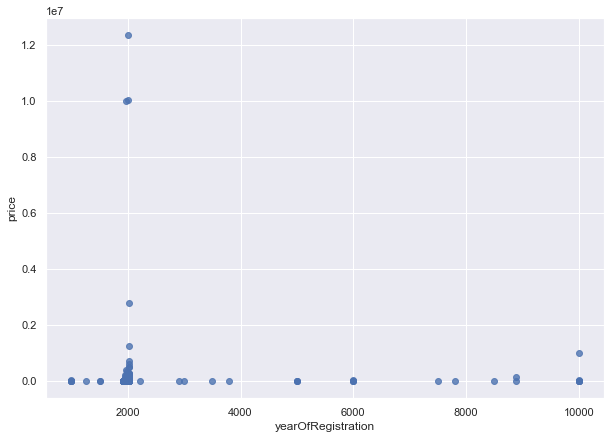

In [20]:
# working range 1950 to 2018  (REG PLOT)


sum(car['yearOfRegistration']>2018)
sum(car['yearOfRegistration']<1950)
sns.regplot(x='yearOfRegistration',y='price',scatter=True,fit_reg=False,data=car)



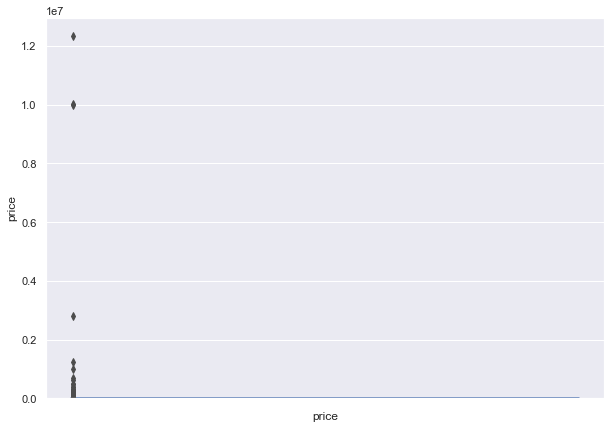

In [21]:
# variable price  (BOX PLOT)


price_count=car['price'].value_counts().sort_index()
sns.distplot(car['price'])
car['price'].describe()
sns.boxplot(y=car['price'])

In [22]:
# working range 100 and 150000



sum(car['price']>150000)
sum(car['price']<500)


4777

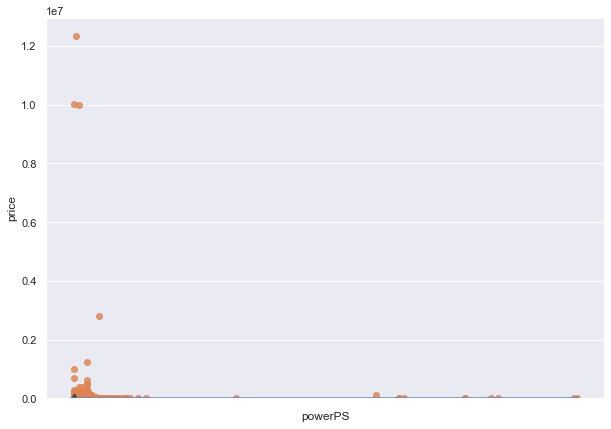

In [23]:
# variable powerPS  (REG PLOT)


power_count=car['powerPS'].value_counts().sort_index()
sns.distplot(car['powerPS'])
car['powerPS'].describe()
sns.boxplot(y=car['powerPS'])
sns.regplot(x='powerPS',y='price',scatter=True,fit_reg=False,data=car)

In [24]:
# working range 10 and 500


sum(car['powerPS']>500)
sum(car['powerPS']<10)


5565

In [26]:
# 6700 record are dropped using below code

car=car[(car.yearOfRegistration <=2018)
        & (car.yearOfRegistration >=1950)
        & (car.price >=100)
        & (car.price <=150000)
        & (car.powerPS >=10)
        & (car.powerPS <=500)
       ]


In [27]:
# Further More simplify variable by reducing 

# combining yearofregistration and monthofregistration


car['monthOfRegistration']/=12


In [28]:
# creating age by adding yearOfRegistration and monthOfRegistration


car['age']=(2018-car['yearOfRegistration']) + car['monthOfRegistration']
car['age']=round(car['age'],2)
car['age'].describe()


count    42772.000000
mean        14.872642
std          7.093125
min          0.000000
25%         10.330000
50%         14.830000
75%         19.170000
max         67.750000
Name: age, dtype: float64

In [29]:
# dropping yearOfRegistration and monthOfRegistration

car=car.drop(columns=['yearOfRegistration','monthOfRegistration'],axis=1)
print(car)


           seller offerType  price   abtest    vehicleType    gearbox  \
0         private     offer   4450     test      limousine     manual   
1         private     offer  13299  control            suv     manual   
2         private     offer   3200     test            bus     manual   
3         private     offer   4500  control      small car     manual   
4         private     offer  18750     test            suv  automatic   
...           ...       ...    ...      ...            ...        ...   
49991     private     offer  10900     test      limousine     manual   
49992     private     offer    790     test      limousine     manual   
49993     private     offer    830     test      small car     manual   
49995     private     offer   2290     test  station wagon     manual   
50000  commercial     offer   1100     test      small car     manual   

       powerPS     model  kilometer fuelType       brand notRepairedDamage  \
0          150       3er     150000   diesel 

# Visualization

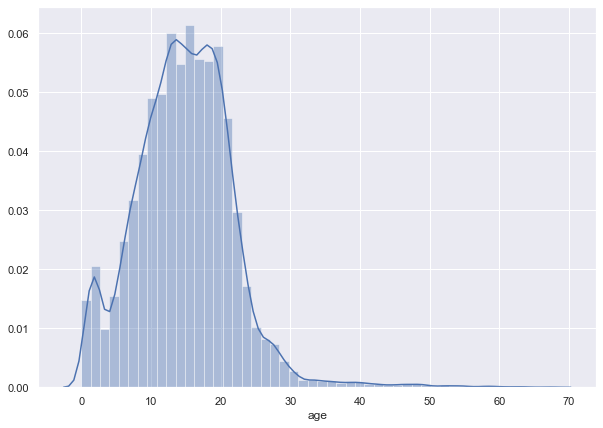

In [30]:
# age

sns.distplot(car['age'])



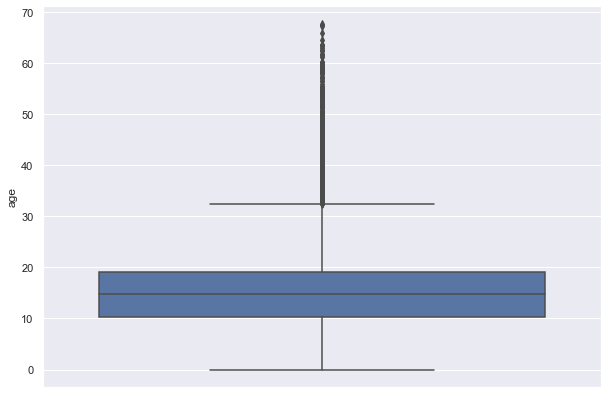

In [31]:
sns.boxplot(y=car['age'])


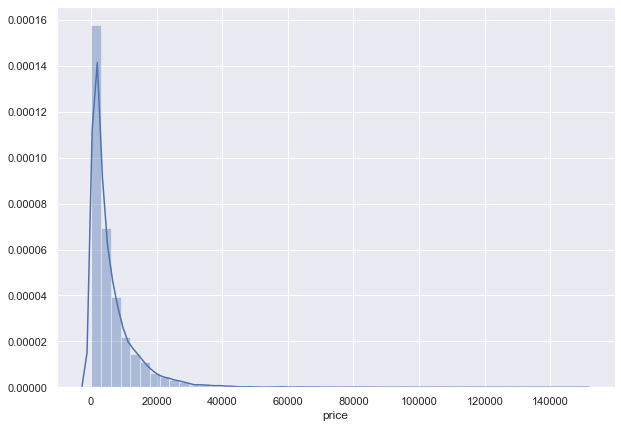

In [32]:
# price


sns.distplot(car['price'])


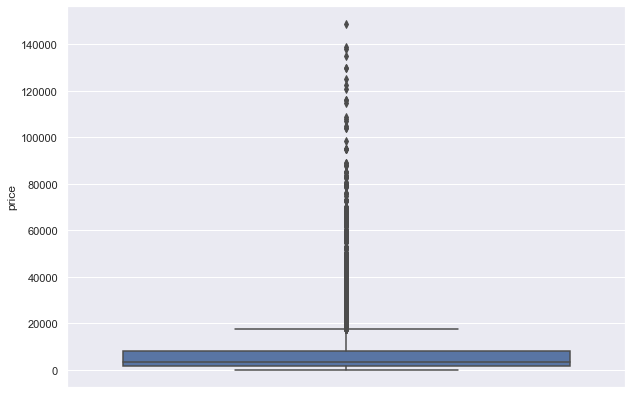

In [33]:

sns.boxplot(y=car['price'])


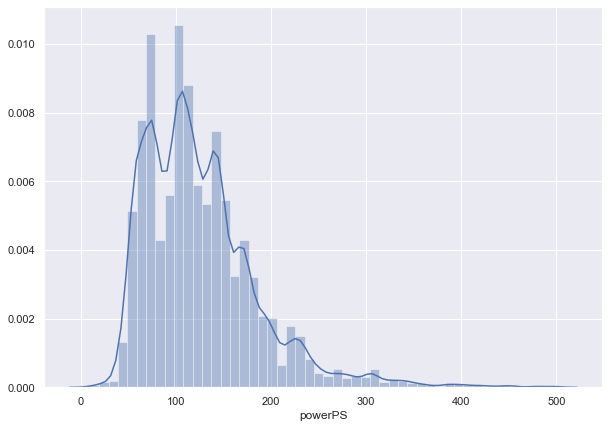

In [34]:
# powerPS

sns.distplot(car['powerPS'])


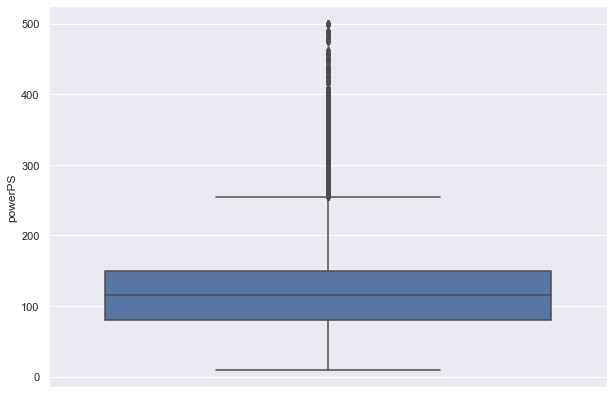

In [35]:
sns.boxplot(y=car['powerPS'])

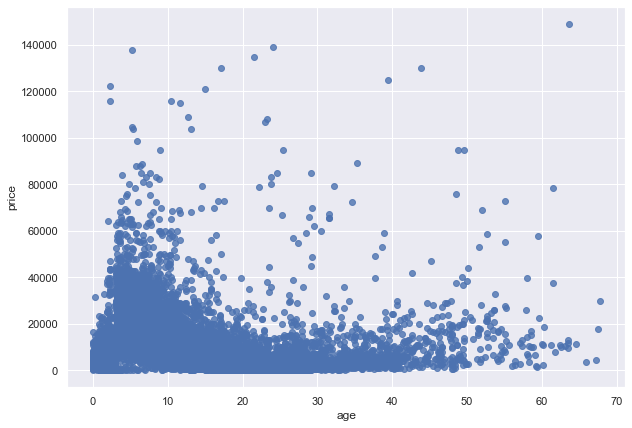

In [36]:
# age vs price

sns.regplot(x='age',y='price',scatter=True,fit_reg=False,data=car)


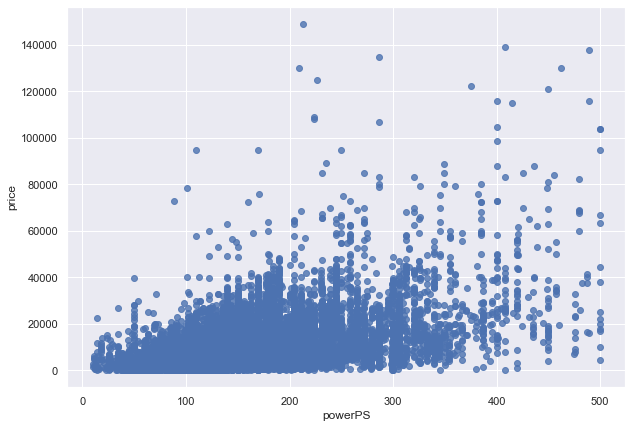

In [37]:
# powerPS VS price



sns.regplot(x=car['powerPS'],y=car['price'],scatter=True,fit_reg=False,data=car)


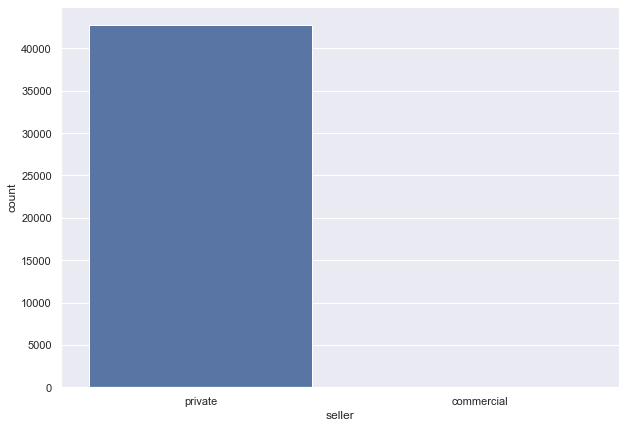

In [38]:
# Find the insignificant variable, after finding insignificant variable we will remove them.  (COUNT PLOT)

# variable  seller(categorical var.)


car['seller'].value_counts()
pd.crosstab(car['seller'],columns='count',normalize=True)
sns.countplot(x='seller',data=car)


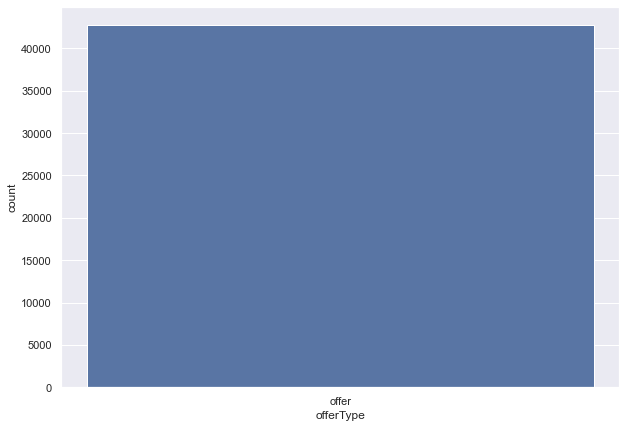

In [39]:
# Fewer cars have commercial= insignificant


# variable offerType


car['offerType'].value_counts()
pd.crosstab(car['offerType'],columns='count',normalize=True)
sns.countplot(x='offerType',data=car)


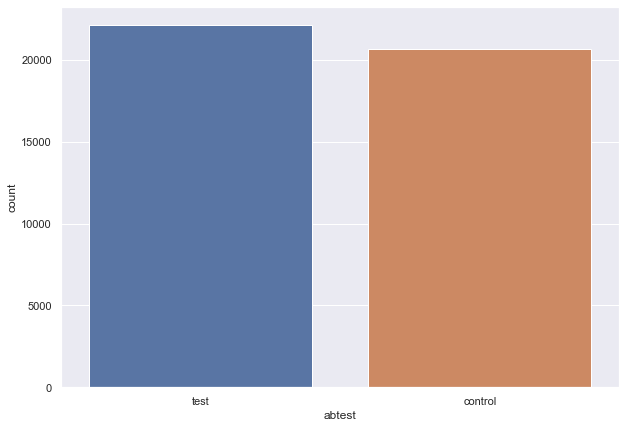

In [40]:
# all cars have offer=insignificant

# variable abtest


car['abtest'].value_counts()
pd.crosstab(car['abtest'],columns='count',normalize=True)
sns.countplot(x='abtest',data=car)

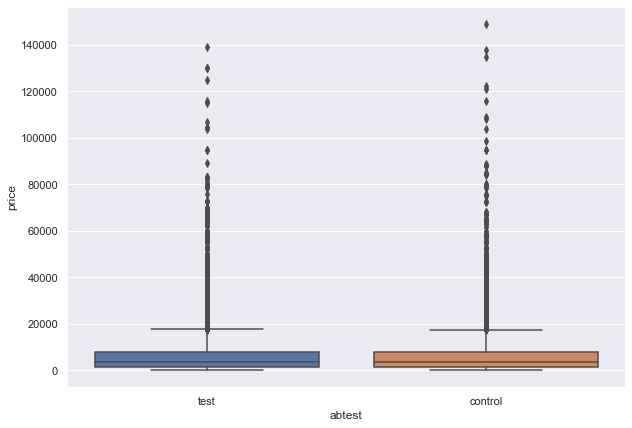

In [41]:
# equally distributed =insignificant


sns.boxplot(x='abtest',y='price',data=car)
# for every price value there is almost 50:50 distribution
# does not affect price= insignificant



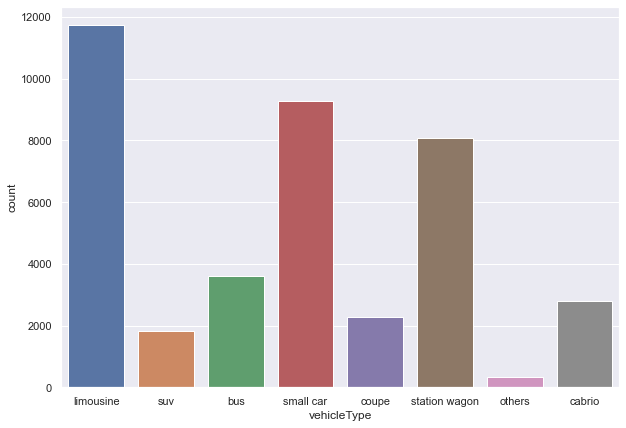

In [42]:
# variable vehicleType (COUNT PLOT)


car['vehicleType'].value_counts()
pd.crosstab(car['vehicleType'],columns='count',normalize=True)
sns.countplot(x='vehicleType',data=car)


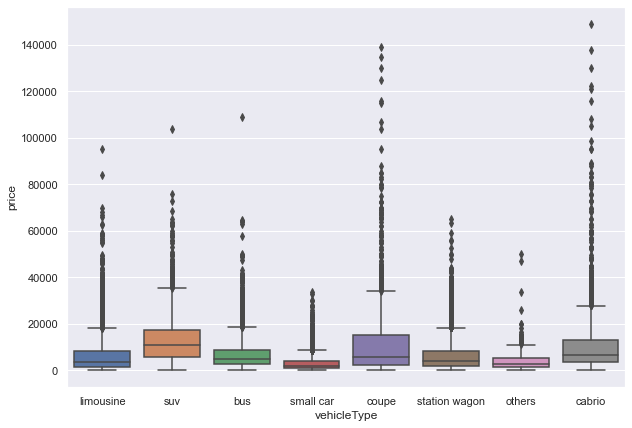

In [43]:
sns.boxplot(x='vehicleType',y='price',data=car)


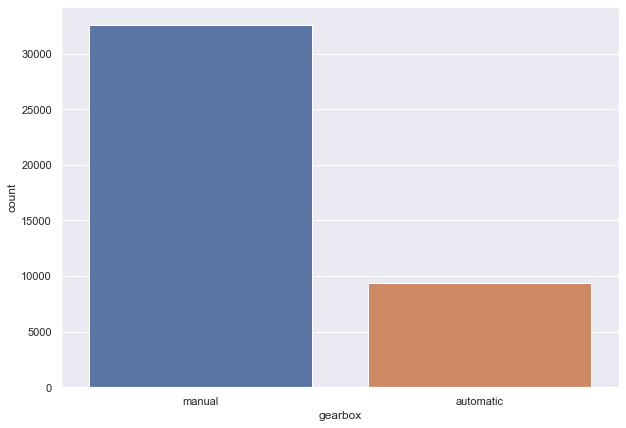

In [44]:
# vehicleType affects price

# variable gearbox


car['gearbox'].value_counts()
pd.crosstab(car['gearbox'],columns='count',normalize=True)
sns.countplot(x='gearbox',data=car)



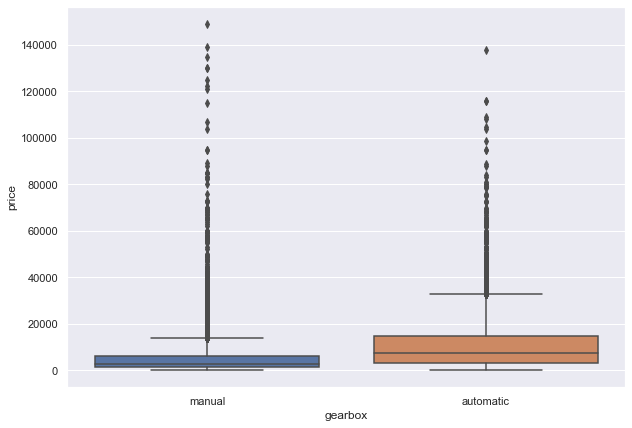

In [45]:
sns.boxplot(x='gearbox',y='price',data=car)

# gearbox affects price

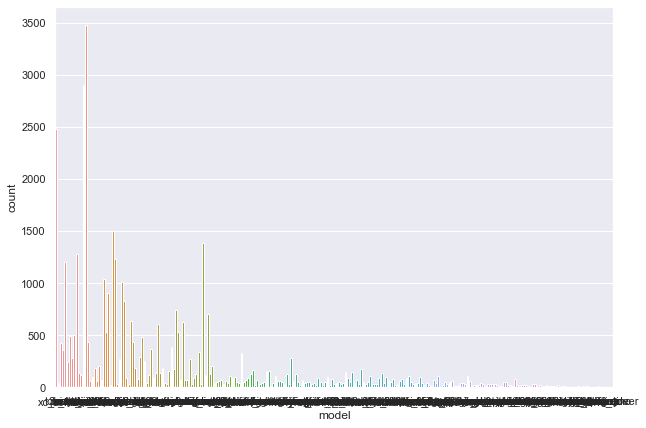

In [46]:
# variable model


car['model'].value_counts()
pd.crosstab(car['model'],columns='count',normalize=True)
sns.countplot(x='model',data=car)


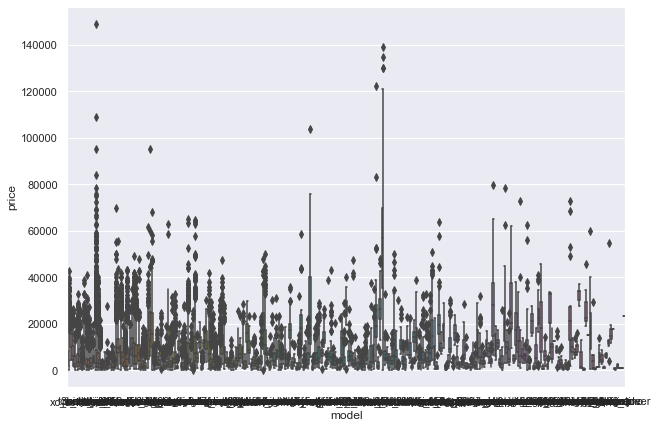

In [47]:
sns.boxplot(x='model',y='price',data=car)
# cars are distributed over many models
# significant variable



count     42772.000000
mean     125815.252969
std       39078.120302
min        5000.000000
25%      100000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: kilometer, dtype: float64

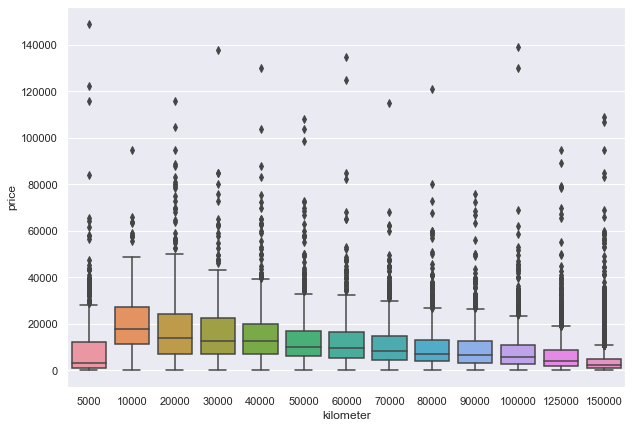

In [48]:
# Variable kilometer

car['kilometer'].value_counts().sort_index()
pd.crosstab(car['kilometer'],columns='count',normalize=True)
sns.boxplot(x='kilometer',y='price',data=car)
car['kilometer'].describe()


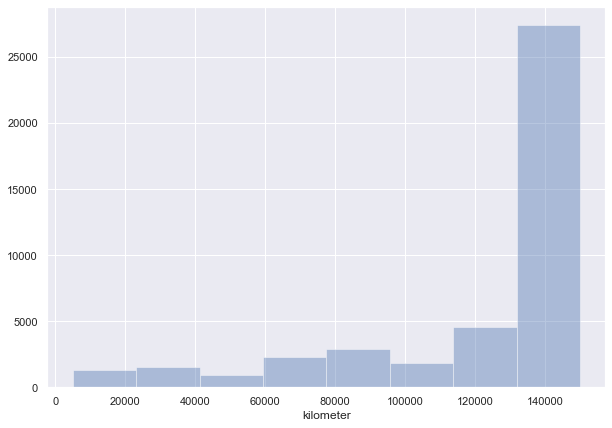

In [49]:

sns.distplot(car['kilometer'],bins=8,kde=False)



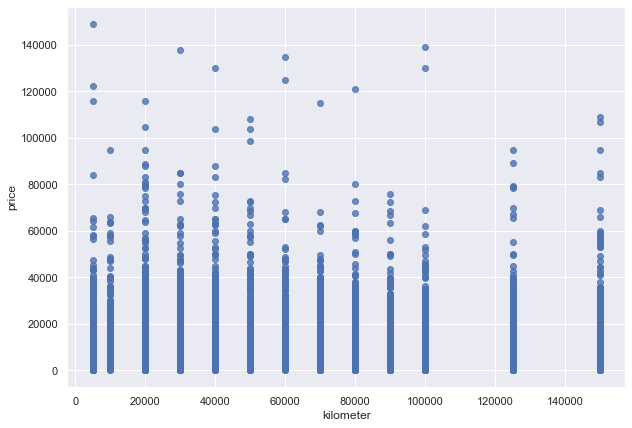

In [50]:
sns.regplot(x='kilometer',y='price',scatter=True,fit_reg=False,data=car)
# significant variable


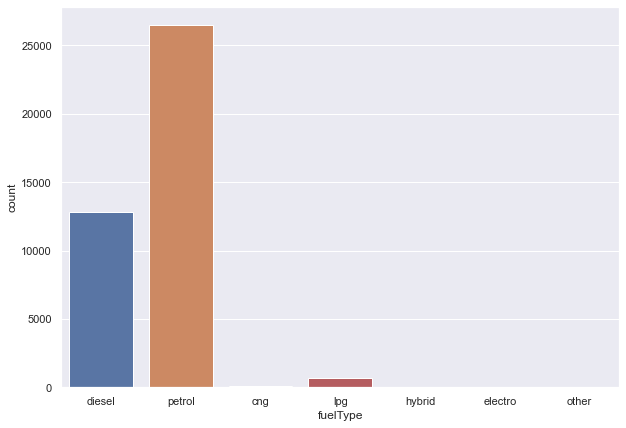

In [51]:
# variable fuelType


car['fuelType'].value_counts()
pd.crosstab(car['fuelType'],columns='count',normalize=True)
sns.countplot(x='fuelType',data=car)



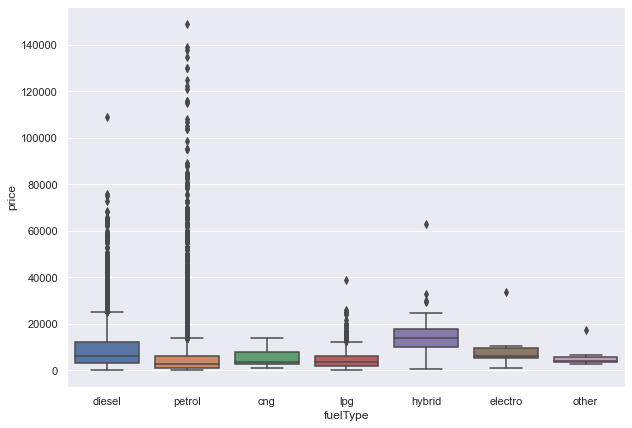

In [52]:
sns.boxplot(x='fuelType',y='price',data=car)
# affects price=significant



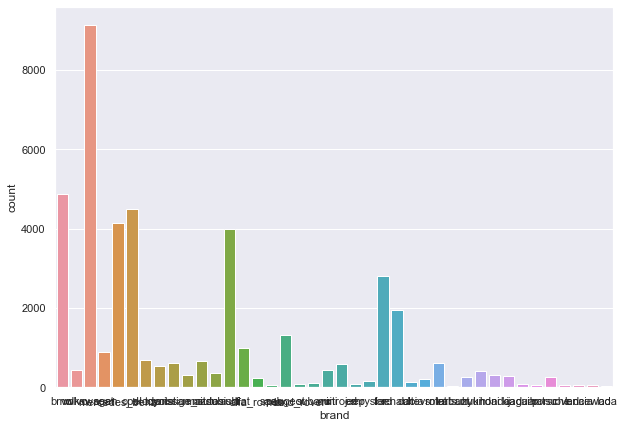

In [53]:
# variable brand


car['brand'].value_counts()
pd.crosstab(car['brand'],columns='count',normalize=True)
sns.countplot(x='brand',data=car)


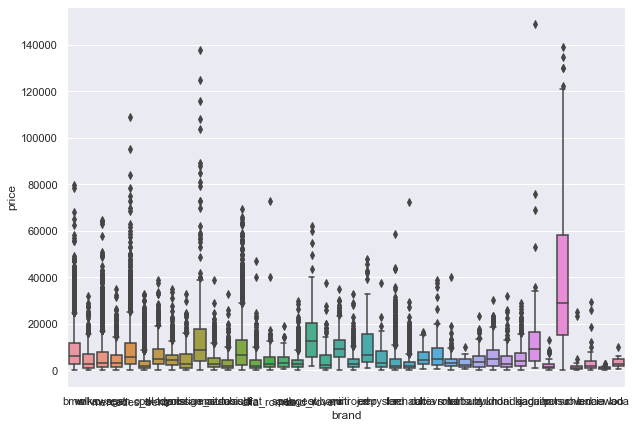

In [54]:

sns.boxplot(x='brand',y='price',data=car)
# cars are distributed over many brands= significant


In [55]:
# # Removing insignificant variables

col=['seller','offerType','abtest']
car=car.drop(columns=col,axis=1)
car1=car.copy()


In [56]:
# correlation 

car_cor=car1.select_dtypes(exclude=[object])
car_cor.corr()


,price,powerPS,kilometer,age
price,1.000000,0.575234,-0.440138,-0.335821
powerPS,0.575234,1.000000,-0.015629,-0.151394
kilometer,-0.440138,-0.015629,1.000000,0.292164
age,-0.335821,-0.151394,0.292164,1.000000


In [57]:

car_cor.corr().loc[:,'price'].abs().sort_values(ascending=False)[1:]
# highest correlation is between powerPS with price



powerPS      0.575234
kilometer    0.440138
age          0.335821
Name: price, dtype: float64

In [58]:
print(car)

       price    vehicleType    gearbox  powerPS     model  kilometer fuelType  \
0       4450      limousine     manual      150       3er     150000   diesel   
1      13299            suv     manual      163  xc_reihe     150000   diesel   
2       3200            bus     manual      101    touran     150000   diesel   
3       4500      small car     manual       86     ibiza      60000   petrol   
4      18750            suv  automatic      185  xc_reihe     150000   diesel   
...      ...            ...        ...      ...       ...        ...      ...   
49991  10900      limousine     manual      231   x_reihe     150000   petrol   
49992    790      limousine     manual       82     astra     150000   diesel   
49993    830      small car     manual       60      clio     125000   petrol   
49995   2290  station wagon     manual      101     astra     150000   petrol   
50000   1100      small car     manual       38     matiz     150000   petrol   

            brand notRepair